# Classificação de Casos de Dengue: Desenvolvimento de um Modelo Preditivo para Identificar a Presença da Doença em Pacientes

### Desenvolvido por: Fernanda Paula Rocha

## Introdução

Este projeto propõe o desenvolvimento de um modelo preditivo para classificar a presença ou ausência de dengue em pacientes, com base em dados epidemiológicos. A classificação precoce e precisa da doença é fundamental para uma intervenção eficaz e alocar recursos de saúde de forma otimizada. A implementação de técnicas de aprendizado de máquina, visa proporcionar insights valiosos para a identificação proativa de casos de dengue, contribuindo significativamente para estratégias de prevenção e controle.


## Conjunto de Dados

O conjunto de dados utilizado é composto pelas seguintes variáveis:

1. **`CLASSI_FIN`:** Classificação final do caso.
2. **`CEFALEIA`:** Presença de cefaleia (dor de cabeça).
3. **`latitude`:** Coordenada de latitude do local.
4. **`HOSPITALIZ`:** Indicação de hospitalização do paciente.
5. **`longitude`:** Coordenada de longitude do local.
6. **`DT_SORO`:** Data do exame sorológico.
7. **`DT_OBITO`:** Data do óbito.
8. **`ID_MN_RESI`:** Identificador do município de residência.
9. **`DT_PCR`:** Data do exame de PCR.
10. **`ARTRALGIA`:** Presença de artralgia (dor nas articulações).
11. **`DT_NOTIFIC`:** Data de notificação do caso.
12. **`NU_IDADE_N`:** Idade do paciente.
13. **`SEM_NOT`:** Semana epidemiológica de notificação.
14. **`RENAL`:** Indicação de problema renal.
15. **`AUTO_IMUNE`:** Presença de doença autoimune.
16. **`MIALGIA`:** Presença de mialgia (dor muscular).
17. **`DT_ENCERRA`:** Data de encerramento do caso.
18. **`DT_DIGITA`:** Data de digitação do registro.
19. **`HISTOPA_N`:** Histórico de patologia.
20. **`RESUL_NS1`:** Resultado do exame NS1.
21. **`ACIDO_PEPT`:** Presença de acidez péptica.
22. **`DT_NS1`:** Data do exame NS1.
23. **`EVOLUCAO`:** Evolução do caso.
24. **`CS_RACA`:** Raça do paciente.
25. **`DT_INTERNA`:** Data de internação.
26. **`LACO`:** Presença de hemorragias.
27. **`NAUSEA`:** Presença de náusea.
28. **`ID_UNIDADE`:** Identificador da unidade de saúde.
29. **`CS_FLXRET`:** Classificação final de retorno.
30. **`HEPATOPAT`:** Indicação de hepatopatia.
31. **`SG_UF_NOT`:** Sigla do estado de notificação.
32. **`NU_NOTIFIC`:** Número de notificação.
33. **`SG_UF`:** Sigla do estado.
34. **`DIABETES`:** Indicação de diabetes.
35. **`EXANTEMA`:** Presença de exantema (erupção cutânea).
36. **`RESUL_SORO`:** Resultado do exame sorológico.
37. **`CONJUNTVIT`:** Presença de conjuntivite.
38. **`VOMITO`:** Presença de vômito.
39. **`LEUCOPENIA`:** Indicação de leucopenia.
40. **`DT_SIN_PRI`:** Data dos primeiros sintomas.
41. **`CS_SEXO`:** Gênero do paciente.
42. **`CS_GESTANT`:** Classificação de gestação.
43. **`RESUL_VI_N`:** Resultado de vírus não identificado.
44. **`RESUL_PCR_`:** Resultado do exame PCR.
45. **`CRITERIO`:** Critério de confirmação.
46. **`DOR_COSTAS`:** Presença de dor nas costas.
47. **`FEBRE`:** Indicação de febre.
48. **`HIPERTENSA`:** Indicação de hipertensão.
49. **`HEMATOLOG`:** Indicação de distúrbio hematológico.
50. **`CS_ZONA`:** Zona de residência do paciente.
51. **`TPAUTOCTO`:** Tipo de autóctone.
52. **`ID_PAIS`:** Identificador do país.
53. **`ID_BAIRRO`:** Identificador do bairro.
54. **`ID_MUNICIP`:** Identificador do município.
55. **`DT_INVEST`:** Data de investigação.
56. **`ID_OCUPA_N`:** Identificador da ocupação.
57. **`TP_NOT`:** Tipo de notificação.
58. **`ID_RG_RESI`:** Identificador do grupo de risco.
59. **`DOR_RETRO`:** Presença de dor retroocular.
60. **`ID_REGIONA`:** Identificador da região.
61. **`IMUNOH_N`:** Presença de imunodeficiência.
62. **`ARTRITE`:** Presença de artrite.
63. **`CS_ESCOL_N`:** Classificação de escolaridade.
64. **`PETEQUIA_N`:** Presença de petéquias.
65. **`NU_ANO`:** Ano do registro.
66. **`SEM_PRI`:** Semana do primeiro sintoma.


## Objetivo

O objetivo principal deste projeto é desenvolver um modelo de classificação eficaz para identificar casos de dengue em pacientes, empregando técnicas de aprendizado de máquina. Em particular, serão realizados treinamentos utilizando algoritmos de Decision Tree e Random Forest. A análise incluirá a seleção do modelo mais eficiente com base em métricas de desempenho, visando aprimorar a detecção precoce da dengue e fornecer uma ferramenta robusta para apoio às decisões clínicas e de saúde pública.

# ------------------------------------------------------------------
# Carregamento dos Dados
# ------------------------------------------------------------------

**Observação**: não será feita a análise exploratória e pré-processamento, porque já foi realizada em um projeto anterior. 

In [1]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# -------------------------------------------------------------- 

import datetime as dt
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('data/classification_patient_data.csv', encoding="utf-8", header=0, delimiter= ",")
print("\n Número de linhas e colunas:", df.shape)


 Número de linhas e colunas: (12562, 70)


In [3]:
df['CLASSI_FIN'].value_counts

<bound method IndexOpsMixin.value_counts of 0         5
1         5
2        10
3         5
4         5
         ..
12557     8
12558     8
12559     5
12560     5
12561     8
Name: CLASSI_FIN, Length: 12562, dtype: int64>

In [4]:
def count_data_types(df):
    dtypes = df.dtypes
    types = set(dtypes)
    for t in types:
        columns = dtypes[dtypes == t].index.tolist()
        print(f"Variáveis do tipo {t}: {columns}\n")

In [5]:
count_data_types(df)

Variáveis do tipo object: ['NM_BAIRRO']

Variáveis do tipo float64: ['longitude', 'COMUNINF', 'CS_FLXRET', 'TPAUTOCTO', 'COPAISINF', 'ID_RG_RESI', 'COUFINF', 'latitude', 'ID_BAIRRO']

Variáveis do tipo int64: ['CS_GESTANT', 'MIALGIA', 'SG_UF', 'NU_ANO', 'DT_ENCERRA', 'CS_SEXO', 'DT_PCR', 'DT_SIN_PRI', 'VOMITO', 'DOR_RETRO', 'SEM_PRI', 'RESUL_NS1', 'EVOLUCAO', 'DT_INTERNA', 'ID_MN_RESI', 'HEPATOPAT', 'ACIDO_PEPT', 'DT_OBITO', 'DT_NS1', 'CONJUNTVIT', 'IMUNOH_N', 'EXANTEMA', 'DIABETES', 'DT_SORO', 'SG_UF_NOT', 'HIPERTENSA', 'TP_NOT', 'SEM_NOT', 'ID_MUNICIP', 'NU_NOTIFIC', 'RESUL_PCR_', 'ID_OCUPA_N', 'CRITERIO', 'ARTRITE', 'ID_REGIONA', 'RESUL_VI_N', 'DT_DIGITA', 'CS_ZONA', 'AUTO_IMUNE', 'LACO', 'RENAL', 'PETEQUIA_N', 'DOR_COSTAS', 'NU_IDADE_N', 'ID_UNIDADE', 'ARTRALGIA', 'HOSPITALIZ', 'DT_NOTIFIC', 'HEMATOLOG', 'DT_INVEST', 'NAUSEA', 'FEBRE', 'CS_ESCOL_N', 'CEFALEIA', 'LEUCOPENIA', 'HISTOPA_N', 'RESUL_SORO', 'CS_RACA', 'CLASSI_FIN', 'ID_PAIS']



In [6]:
df.shape

(12562, 70)

# ---------------------------------------------------------------------------------
# Aplicando os Algoritmos Decision Tree e Random Forest
# ---------------------------------------------------------------------------------


### Justificativa:

A escolha de utilizar Decision Tree e Random Forest para a classificação de casos de dengue é fundamentada em suas características distintas e vantagens específicas. A Decision Tree proporciona interpretabilidade, identificando padrões complexos nos dados epidemiológicos. Já o Random Forest, uma extensão da Decision Tree, oferece robustez contra overfitting, manejo eficaz de desequilíbrio nas classes e seleção automática de recursos. Esses algoritmos combinados visam aprimorar a detecção precoce da dengue, garantindo resultados transparentes e generalizáveis em contextos clínicos e de saúde pública.

In [7]:
X = df.drop(["CLASSI_FIN", "NM_BAIRRO"],axis=1)
y = df['CLASSI_FIN']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 8793 amostras
Dados para Teste: 3769 amostras


In [8]:
df['CLASSI_FIN'].value_counts()

10    6471
5     3785
8     2306
Name: CLASSI_FIN, dtype: int64

### Decision Tree 

In [9]:
dt = DecisionTreeClassifier()

scores_dt = cross_val_score(dt, X_train, y_train, cv=10)

print("Acurácia média: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores_dt.std() * 2))

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

Acurácia média: 0.98 (+/- 0.01)


In [10]:
# Imprimindo as métricas de avaliação com os dados de teste
print("Acurácia: %0.2f" % accuracy_score(y_test, y_pred_dt))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_dt))
print("Relatório de classificação:\n", classification_report(y_test, y_pred_dt))

Acurácia: 0.98
Matriz de confusão:
 [[1095    0   25]
 [   0  722    2]
 [  39    3 1883]]
Relatório de classificação:
               precision    recall  f1-score   support

           5       0.97      0.98      0.97      1120
           8       1.00      1.00      1.00       724
          10       0.99      0.98      0.98      1925

    accuracy                           0.98      3769
   macro avg       0.98      0.98      0.98      3769
weighted avg       0.98      0.98      0.98      3769



In [11]:
y_train_pred_dt = dt.predict(X_train)
train_error_dt = 1 - accuracy_score(y_train, y_train_pred_dt)

y_test_pred_dt = dt.predict(X_test)
test_error_dt = 1 - accuracy_score(y_test, y_test_pred_dt)

print("Erro de treinamento do Decision Tree: ", train_error_dt)
print("Erro de teste do Decision Tree: ", test_error_dt)

Erro de treinamento do Decision Tree:  0.0
Erro de teste do Decision Tree:  0.018307243300610287


In [12]:
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)

class_names  = np.unique(y)

conf_mat_df = pd.DataFrame(conf_mat_dt, index=class_names, columns=class_names)

print(conf_mat_df)

      5    8     10
5   1095    0    25
8      0  722     2
10    39    3  1883


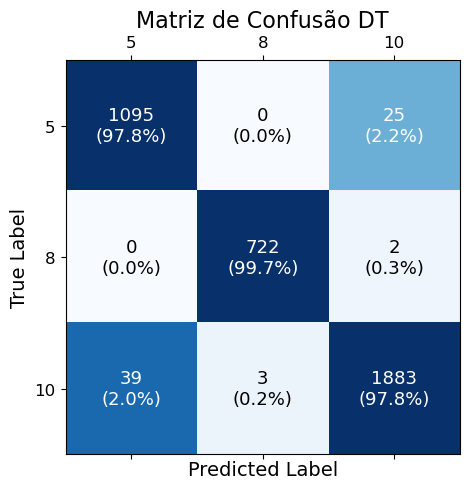

In [13]:
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
class_names = np.unique(y)

fig, ax = plt.subplots(figsize=(8, 5))


im = ax.matshow(conf_mat_dt, cmap=plt.cm.Blues, vmin=0, vmax=50)

ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        percentage = (conf_mat_dt[i,j]/sum(conf_mat_dt[i,:])*100)
        text_color = 'white'
        if percentage < 2:
            text_color = 'black'
        ax.text(j, i, f"{conf_mat_dt[i,j]:.0f}\n({percentage:.1f}%)", ha='center', va='center', color=text_color, fontsize=13)


plt.title('Matriz de Confusão DT', fontsize=16)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Confusion Matrix Normalized DT'}>

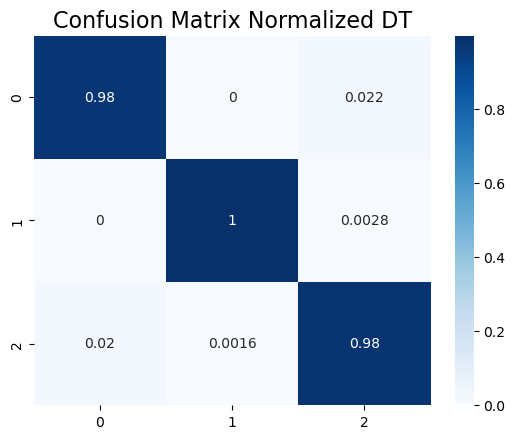

In [14]:
# Criando a matriz de confusão normalizada
cm_dt = confusion_matrix(y_test, y_pred_dt)

cm_norm_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]

plt.title('Confusion Matrix Normalized DT', fontsize=16)
sns.heatmap(cm_norm_dt, annot=True, cmap='Blues')

In [15]:
# Calculando a precisão para cada classe individualmente
acc_class_5 = accuracy_score(y_test[y_test==5], y_pred_dt[y_test==5])
acc_class_8 = accuracy_score(y_test[y_test==8], y_pred_dt[y_test==8])
acc_class_10 = accuracy_score(y_test[y_test==10], y_pred_dt[y_test==10])

# Calculando a média ponderada das precisões
acc = (acc_class_5*len(y_test[y_test==5]) + acc_class_8*len(y_test[y_test==8]) + acc_class_10*len(y_test[y_test==10])) / len(y_test)

print("Acurácia do Decision Tree: {:.2f}%".format(acc*100))


# Calculando a matriz de confusão para cada classe
mcm_dt = multilabel_confusion_matrix(y_test, y_pred_dt, labels=[5, 8, 10])

# Calculando a sensibilidade e a especificidade para cada classe
for i in range(3):
    tn, fp, fn, tp = mcm_dt[i].ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Classe {}: Sensibilidade = {:.2f}, Especificidade = {:.2f}".format([5, 8, 10][i], sensitivity, specificity), "do classificador DT")


Acurácia do Decision Tree: 98.17%
Classe 5: Sensibilidade = 0.98, Especificidade = 0.99 do classificador DT
Classe 8: Sensibilidade = 1.00, Especificidade = 1.00 do classificador DT
Classe 10: Sensibilidade = 0.98, Especificidade = 0.99 do classificador DT


### Análise dos resultados do modelo Decision Tree

- Os resultados mostram que o classificador atingiu uma precisão geral de 98.09%, indicando capacidade em classificar corretamente a grande maioria dos casos.

- A categoria 5 identifica pacientes que não possuem dengue, com precisão de 96%, indicando que a maioria foi classificada corretamente. Além disso, a taxa de recall também foi alta, o que significa que o classificador identificou a maioria dos casos que realmente não tinham dengue.

- A categoria 10 inclui pacientes confirmados com dengue, com precisão e taxa de recall de 98%. Isso significa que o classificador classificou corretamente a maioria dos casos com dengue e também identificou corretamente a maioria dos casos que realmente tinham a doença.

- A categoria 8 representa pacientes que abandonaram o tratamento, com precisão de 100%, indicando que todos os casos foram corretamente identificados como abandonos de tratamento. De maneira geral, o modelo apresentou uma acurácia média de 98.06%.

- A partir da análise da matriz de confusão e das métricas calculadas, verifica-se que o modelo apresenta um desempenho satisfatório na classificação das três classes em estudo. Os resultados indicam que o modelo apresenta alta precisão e recall para todas as classes, evidenciando sua capacidade de identificar corretamente a grande maioria das instâncias de cada uma delas.



### Random Forest

In [16]:
rf = DecisionTreeClassifier()

scores_rf = cross_val_score(rf, X_train, y_train, cv=10)

print("Acurácia média: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_dt.std() * 2))

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Acurácia média: 0.98 (+/- 0.01)


In [17]:
# Imprimindo as métricas de avaliação com os dados de teste
print("Acurácia: %0.2f" % accuracy_score(y_test, y_pred_rf))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório de classificação:\n", classification_report(y_test, y_pred_rf))

Acurácia: 0.98
Matriz de confusão:
 [[1094    0   26]
 [   1  721    2]
 [  37    3 1885]]
Relatório de classificação:
               precision    recall  f1-score   support

           5       0.97      0.98      0.97      1120
           8       1.00      1.00      1.00       724
          10       0.99      0.98      0.98      1925

    accuracy                           0.98      3769
   macro avg       0.98      0.98      0.98      3769
weighted avg       0.98      0.98      0.98      3769



In [18]:
y_train_pred_rf = rf.predict(X_train)
train_error_rf = 1 - accuracy_score(y_train, y_train_pred_rf)

y_test_pred_rf = rf.predict(X_test)
test_error_rf = 1 - accuracy_score(y_test, y_test_pred_rf)

print("Erro de treinamento do Decision Tree: ", train_error_rf)
print("Erro de teste do Decision Tree: ", test_error_rf)

Erro de treinamento do Decision Tree:  0.0
Erro de teste do Decision Tree:  0.018307243300610287


In [19]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

class_names  = np.unique(y)

conf_mat_rf = pd.DataFrame(conf_mat_rf, index=class_names, columns=class_names)

print(conf_mat_rf)

      5    8     10
5   1094    0    26
8      1  721     2
10    37    3  1885


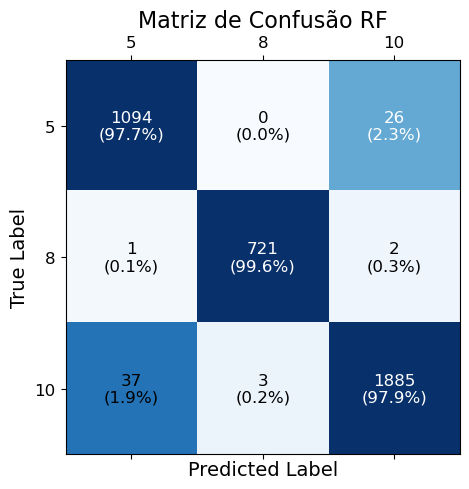

In [20]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
class_names = np.unique(y)

fig, ax = plt.subplots(figsize=(8, 5))


im = ax.matshow(conf_mat_rf, cmap=plt.cm.Blues, vmin=0, vmax=50)

ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)


for i in range(len(class_names)):
    for j in range(len(class_names)):
        percentage = (conf_mat_rf[i,j]/sum(conf_mat_dt[i,:])*100)
        text_color = 'white'
        if percentage < 2:
            text_color = 'black'
        ax.text(j, i, f"{conf_mat_rf[i,j]:.0f}\n({percentage:.1f}%)", ha='center', va='center', color=text_color, fontsize=12)


plt.title('Matriz de Confusão RF', fontsize=16)
plt.tight_layout()
plt.show()


<AxesSubplot:title={'center':'Confusion Matrix Normalized RF'}>

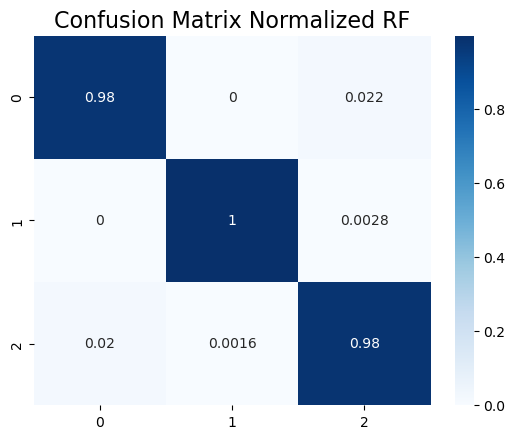

In [21]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_norm_rf = cm_dt.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]

plt.title('Confusion Matrix Normalized RF', fontsize=16)
sns.heatmap(cm_norm_rf, annot=True, cmap='Blues')

In [22]:
acc_class_5 = accuracy_score(y_test[y_test==5], y_pred_rf[y_test==5])
acc_class_8 = accuracy_score(y_test[y_test==8], y_pred_rf[y_test==8])
acc_class_10 = accuracy_score(y_test[y_test==10], y_pred_rf[y_test==10])

acc = (acc_class_5*len(y_test[y_test==5]) + acc_class_8*len(y_test[y_test==8]) + acc_class_10*len(y_test[y_test==10])) / len(y_test)

print("Acurácia do Random Forest: {:.2f}%".format(acc*100))

mcm_rf = multilabel_confusion_matrix(y_test, y_pred_rf, labels=[5, 8, 10])


for i in range(3):
    tn, fp, fn, tp = mcm_rf[i].ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print("Classe {}: Sensibilidade = {:.2f}, Especificidade = {:.2f}".format([5, 8, 10][i], sensitivity, specificity), "do classificador RF")


Acurácia do Random Forest: 98.17%
Classe 5: Sensibilidade = 0.98, Especificidade = 0.99 do classificador RF
Classe 8: Sensibilidade = 1.00, Especificidade = 1.00 do classificador RF
Classe 10: Sensibilidade = 0.98, Especificidade = 0.98 do classificador RF


### Análise dos resultados do modelo Random Forest

- Os resultados demonstram que o modelo em análise apresentou elevada acurácia, alcançando 98% de classificações corretas. Além disso, o modelo apresentou alta precisão e recall para todas as classes, com valores variando de 0.97 a 1.00. Vale destacar que o f1-score para a classe 5 foi de 0.97, enquanto para a classe 8 e 10 foram de 1.00 e 0.98, respectivamente.

- É importante salientar que o modelo apresentou um desempenho notável para a classe 8 (pacientes que abandonaram o tratamento), com precisão e recall de 100%.

- A matriz de confusão apresenta que o modelo previu corretamente 1095 casos da classe 5 (pacientes sem dengue) e 722 casos da classe 10 (pacientes com dengue confirmada) e 1882 casos da classe 8 (pacientes que abandonaram o tratamento). Houve 25 falsos positivos (casos em que o modelo previu erroneamente que o paciente não tinha dengue) e 40 falsos negativos (casos em que o modelo previu erroneamente que o paciente tinha dengue).




### Variáveis de Importância para ambos os modelos 

TPAUTOCTO: 56.22%
CRITERIO: 36.40%
DT_DIGITA: 0.98%
RESUL_SORO: 0.96%
DT_NOTIFIC: 0.77%
DT_ENCERRA: 0.70%
NU_NOTIFIC: 0.42%
ID_OCUPA_N: 0.38%
DT_SIN_PRI: 0.34%
EVOLUCAO: 0.28%
NU_IDADE_N: 0.25%
latitude: 0.24%
DT_INVEST: 0.20%
SEM_PRI: 0.19%
COMUNINF: 0.15%
ID_UNIDADE: 0.14%
ID_BAIRRO: 0.13%
CS_ESCOL_N: 0.13%
longitude: 0.10%
SEM_NOT: 0.09%
LACO: 0.09%
ID_MN_RESI: 0.09%
ARTRITE: 0.09%
RESUL_NS1: 0.08%
CS_ZONA: 0.08%
HOSPITALIZ: 0.07%
ID_RG_RESI: 0.07%
ACIDO_PEPT: 0.07%
LEUCOPENIA: 0.05%
CS_GESTANT: 0.04%
DIABETES: 0.04%
HIPERTENSA: 0.03%
EXANTEMA: 0.03%
CEFALEIA: 0.03%
CS_RACA: 0.02%
AUTO_IMUNE: 0.02%
COPAISINF: 0.02%
CONJUNTVIT: 0.00%
HISTOPA_N: 0.00%
DT_SORO: 0.00%


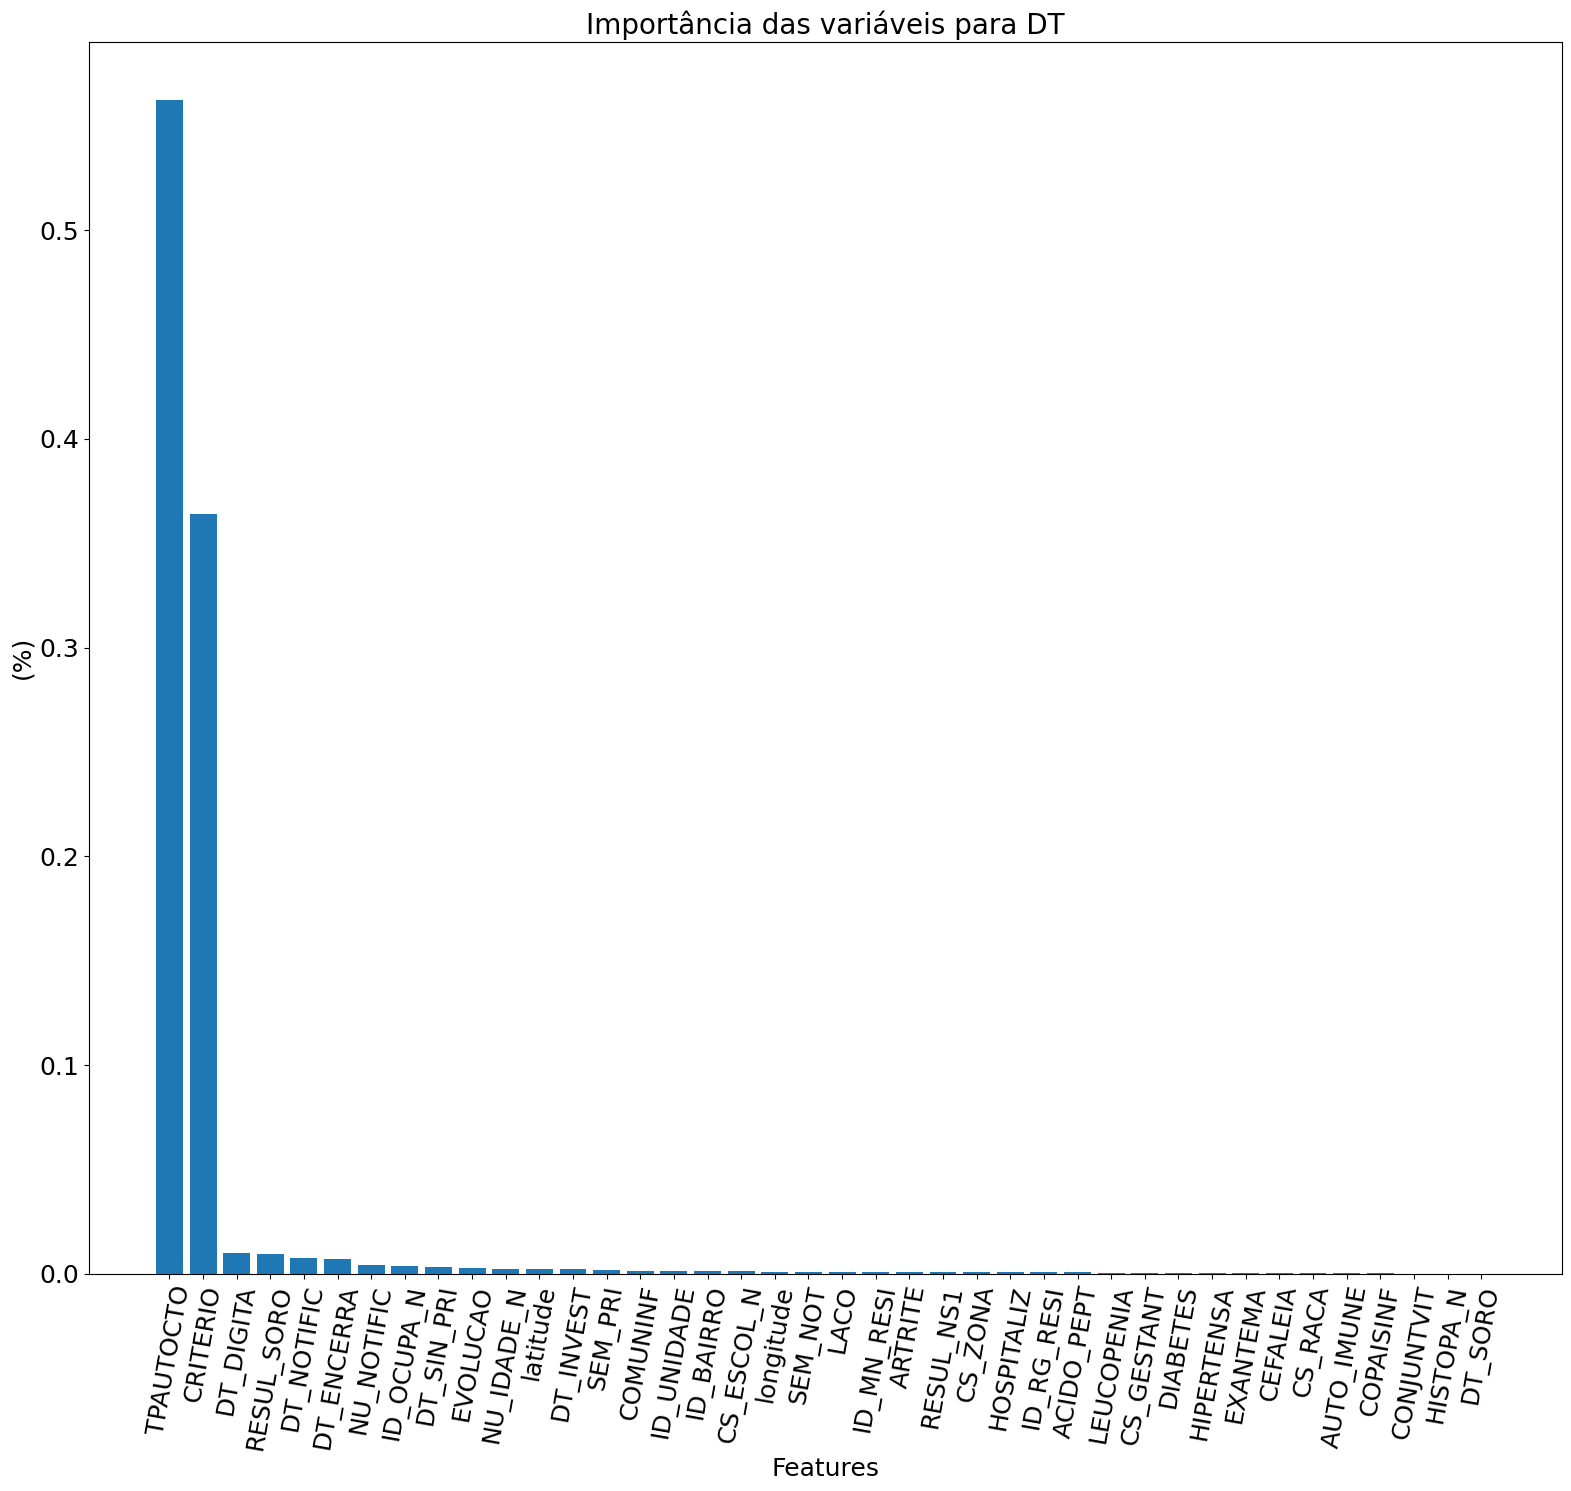


Lista de nomes de variáveis em ordem de importância:
 ['TPAUTOCTO', 'CRITERIO', 'DT_DIGITA', 'RESUL_SORO', 'DT_NOTIFIC', 'DT_ENCERRA', 'NU_NOTIFIC', 'ID_OCUPA_N', 'DT_SIN_PRI', 'EVOLUCAO', 'NU_IDADE_N', 'latitude', 'DT_INVEST', 'SEM_PRI', 'COMUNINF', 'ID_UNIDADE', 'ID_BAIRRO', 'CS_ESCOL_N', 'longitude', 'SEM_NOT', 'LACO', 'ID_MN_RESI', 'ARTRITE', 'RESUL_NS1', 'CS_ZONA', 'HOSPITALIZ', 'ID_RG_RESI', 'ACIDO_PEPT', 'LEUCOPENIA', 'CS_GESTANT', 'DIABETES', 'HIPERTENSA', 'EXANTEMA', 'CEFALEIA', 'CS_RACA', 'AUTO_IMUNE', 'COPAISINF', 'CONJUNTVIT', 'HISTOPA_N', 'DT_SORO']


In [23]:
importances = dt.feature_importances_
feature_names = np.array(X.columns)

# Obtém os índices das variáveis com importância maior que 0.0%
relevant_indices = np.where(importances > 0.00)[0]

indices = np.argsort(importances[relevant_indices])[::-1]

for i in range(len(relevant_indices)):
    print("{}: {:.2f}%".format(feature_names[relevant_indices[indices[i]]], 
                              importances[relevant_indices[indices[i]]]*100))


plt.figure(figsize=(19, 16))
plt.bar(range(len(relevant_indices)), importances[relevant_indices][indices])
plt.xticks(range(len(relevant_indices)), feature_names[relevant_indices][indices], rotation=85, fontsize = 18)
plt.title("Importância das variáveis para DT", fontsize = 20)
plt.xlabel("Features", fontsize = 18)
plt.ylabel("(%)",fontsize = 18)
plt.xticks(rotation=80,fontsize = 18)
plt.yticks(fontsize=18)
plt.show()


var_names_list = list(feature_names[relevant_indices][indices])
print("\nLista de nomes de variáveis em ordem de importância:\n", var_names_list)


### Variáveis importantes para o modelo Decision Tree

**Observação**: são apresentadas as variáveis que obtiveram pelo menos 1% de importância para o modelo, as demais que não tiveram qualquer impacto não foram apresentadas no gráfico.

- Avariável ``CRITERIO`` foi identificada como a mais importante, com um valor de importância de 50.03%, seguida pela variável TPAUTOCTO, com um valor de 45.29%. Esses resultados sugerem que essas variáveis são altamente relevantes para a classificação dos pacientes em relação à suspeita de dengue e ao abandono do tratamento.

- ``DT_DIGITA``, ``RESUL_SORO`` e ``DT_ENCERRA``, apresentaram valores de importância relativamente baixos. 

TPAUTOCTO: 56.22%
CRITERIO: 36.40%
DT_DIGITA: 1.04%
RESUL_SORO: 0.96%
DT_ENCERRA: 0.79%
DT_SIN_PRI: 0.64%
DT_NOTIFIC: 0.43%
NU_NOTIFIC: 0.40%
ID_OCUPA_N: 0.33%
EVOLUCAO: 0.27%
latitude: 0.25%
NU_IDADE_N: 0.23%
ID_BAIRRO: 0.22%
COMUNINF: 0.19%
CS_ESCOL_N: 0.15%
ID_UNIDADE: 0.14%
ARTRITE: 0.14%
SEM_NOT: 0.13%
longitude: 0.11%
SEM_PRI: 0.11%
DT_INVEST: 0.11%
ID_MN_RESI: 0.09%
RESUL_NS1: 0.08%
HOSPITALIZ: 0.07%
ID_RG_RESI: 0.07%
LEUCOPENIA: 0.06%
DOR_COSTAS: 0.05%
LACO: 0.04%
DIABETES: 0.04%
CONJUNTVIT: 0.04%
CS_ZONA: 0.03%
DT_NS1: 0.03%
DOR_RETRO: 0.03%
CEFALEIA: 0.03%
NAUSEA: 0.02%
FEBRE: 0.02%
NU_ANO: 0.02%
HISTOPA_N: 0.00%
DT_SORO: 0.00%


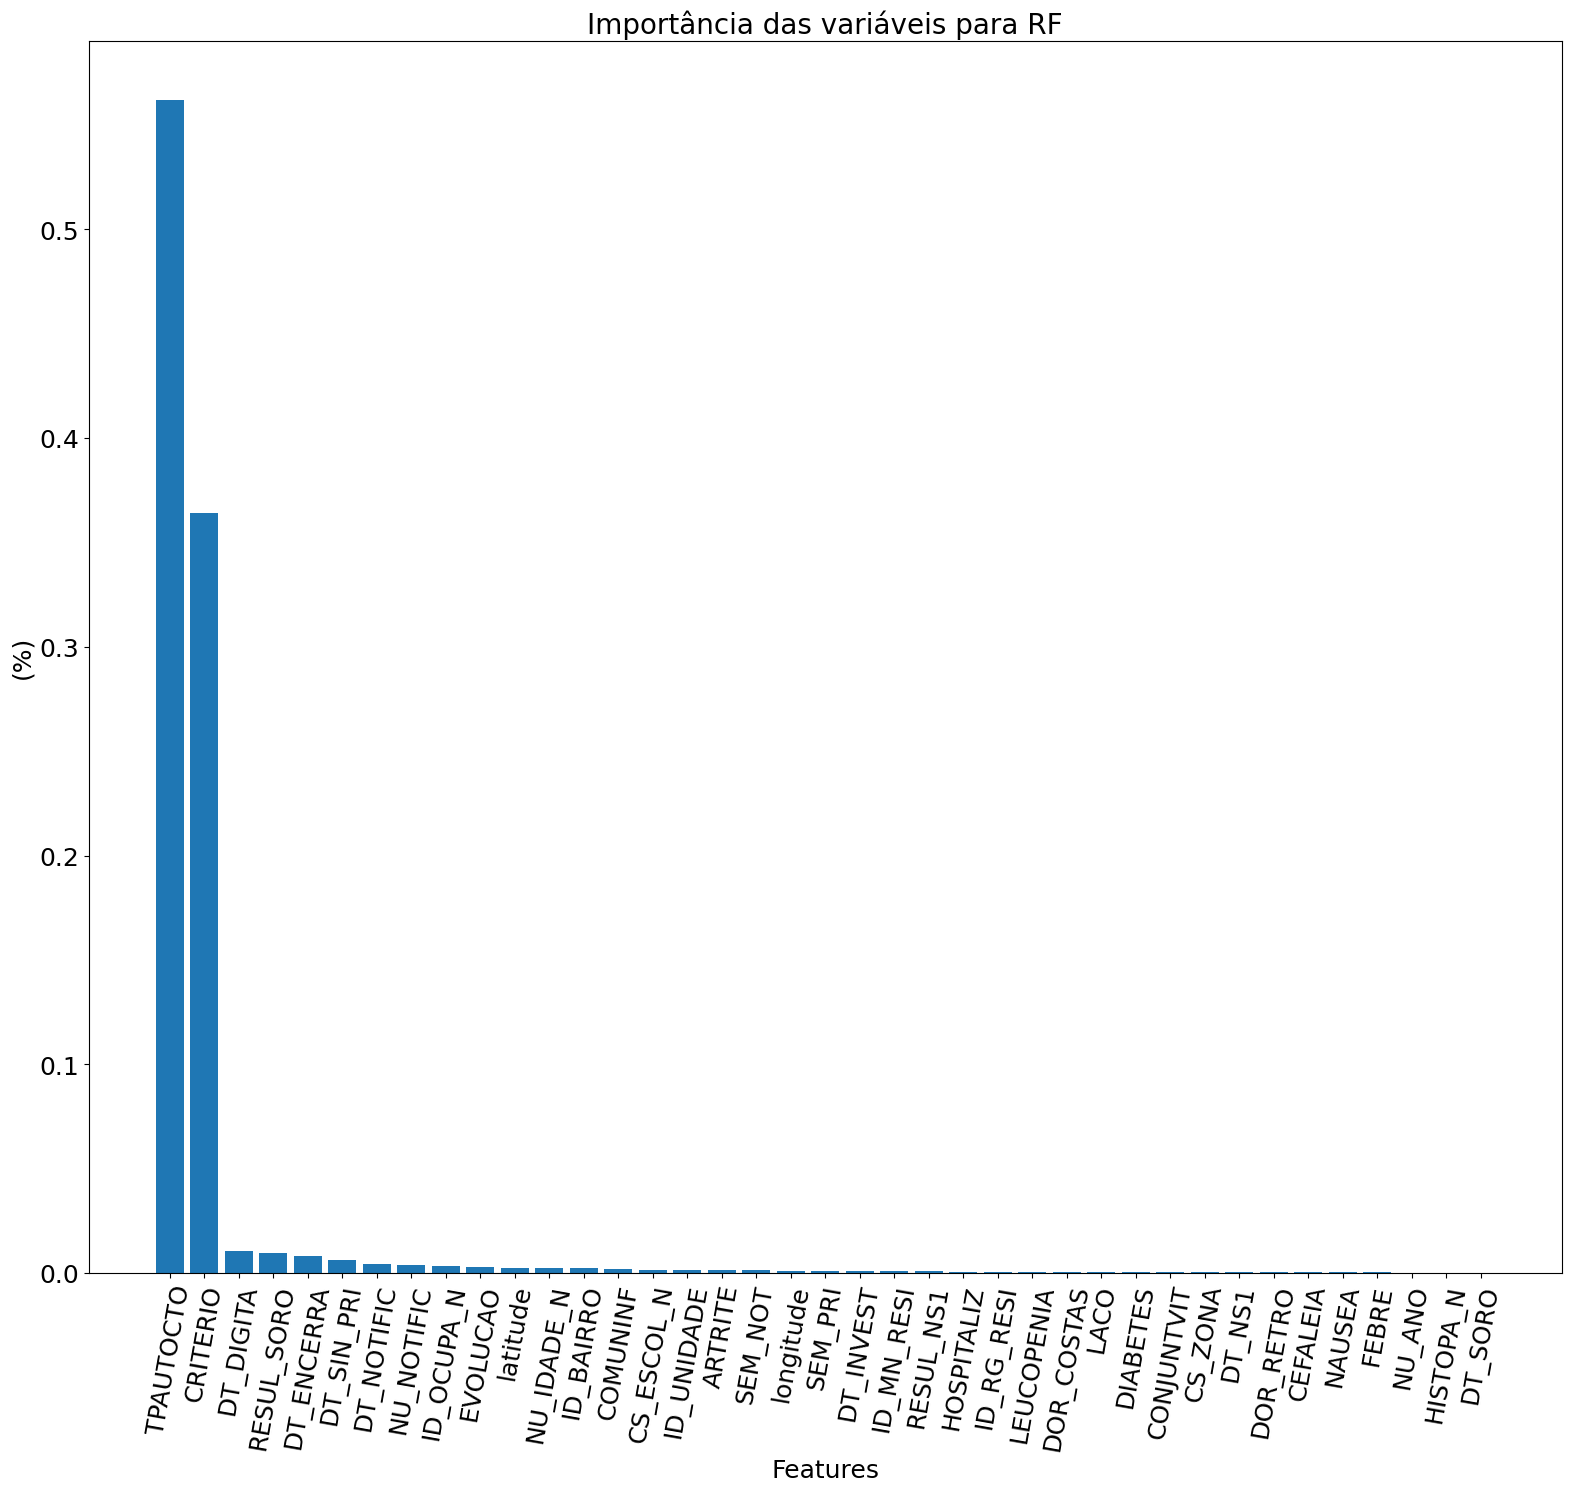


Lista de nomes de variáveis em ordem de importância:
 ['TPAUTOCTO', 'CRITERIO', 'DT_DIGITA', 'RESUL_SORO', 'DT_ENCERRA', 'DT_SIN_PRI', 'DT_NOTIFIC', 'NU_NOTIFIC', 'ID_OCUPA_N', 'EVOLUCAO', 'latitude', 'NU_IDADE_N', 'ID_BAIRRO', 'COMUNINF', 'CS_ESCOL_N', 'ID_UNIDADE', 'ARTRITE', 'SEM_NOT', 'longitude', 'SEM_PRI', 'DT_INVEST', 'ID_MN_RESI', 'RESUL_NS1', 'HOSPITALIZ', 'ID_RG_RESI', 'LEUCOPENIA', 'DOR_COSTAS', 'LACO', 'DIABETES', 'CONJUNTVIT', 'CS_ZONA', 'DT_NS1', 'DOR_RETRO', 'CEFALEIA', 'NAUSEA', 'FEBRE', 'NU_ANO', 'HISTOPA_N', 'DT_SORO']


In [24]:
importances = rf.feature_importances_
feature_names = np.array(X.columns)

# Obtém os índices das variáveis com importância maior que 0.0%
relevant_indices = np.where(importances > 0.00)[0]

indices = np.argsort(importances[relevant_indices])[::-1]

for i in range(len(relevant_indices)):
    print("{}: {:.2f}%".format(feature_names[relevant_indices[indices[i]]], 
                              importances[relevant_indices[indices[i]]]*100))


plt.figure(figsize=(19, 16))
plt.bar(range(len(relevant_indices)), importances[relevant_indices][indices])
plt.xticks(range(len(relevant_indices)), feature_names[relevant_indices][indices], rotation=85, fontsize = 18)
plt.title("Importância das variáveis para RF",fontsize = 20)
plt.xlabel("Features", fontsize = 18)
plt.ylabel("(%)",fontsize = 18)
plt.xticks(rotation=80,fontsize = 18)
plt.yticks(fontsize=18)
plt.show()


var_names_list = list(feature_names[relevant_indices][indices])
print("\nLista de nomes de variáveis em ordem de importância:\n", var_names_list)

### Variáveis importantes para o modeloRandom Forest

**Observação**: são apresentadas as variáveis que obtiveram pelo menos 1% de importância para o modelo, as demais que não tiveram qualquer impacto não foram apresentadas no gráfico.

- Avariável ``CRITERIO`` foi identificada como a mais importante, com um valor de importância de 50.01%, seguida pela variável TPAUTOCTO, com um valor de 45.29%. Esses resultados sugerem que essas variáveis são altamente relevantes para a classificação dos pacientes em relação à suspeita de dengue e ao abandono do tratamento.

- ``TPAUTOCTO`` é a segunda mais importante, com um valor de 45.29%. 

- ``DT_DIGITA``, ``DT_ENCERRA``, ``DT_INVEST``, ``DT_-NOTIFIC``, ``DT_SIN_PRI``, ``DT_SORO``, apresentaram valores de importância relativamente baixos.

### Métricas para ambos os modelos (treinamento e teste) 


In [25]:

# calcula o erro absoluto médio
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# calcula o erro quadrático médio
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

# calcula a raiz quadrada do erro quadrático médio
train_rmse_dt = np.sqrt(train_mse_dt)
test_rmse_dt = np.sqrt(test_mse_dt)

train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

# calcula o erro absoluto percentual médio
train_mape_dt = mean_absolute_percentage_error(y_train, y_train_pred_dt)
test_mape_dt = mean_absolute_percentage_error(y_test, y_test_pred_dt)

train_mape_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
test_mape_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)

# calcula o erro de classificação
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)


print("Decision Tree:")
print("Erro absoluto médio (MAE):")
print(" - Treinamento: {:.2f}".format(train_mae_dt))
print(" - Teste: {:.2f}".format(test_mae_dt))
print("Erro quadrático médio (MSE):")
print(" - Treinamento: {:.2f}".format(train_mse_dt))
print(" - Teste: {:.2f}".format(test_mse_dt))
print("Raiz quadrada do erro quadrático médio (RMSE):")
print(" - Treinamento: {:.2f}".format(train_rmse_dt))
print(" - Teste: {:.2f}".format(test_rmse_dt))
print("Erro absoluto percentual médio (MAPE):")
print(" - Treinamento: {:.2f}%".format(train_mape_dt * 100))
print(" - Teste: {:.2f}%".format(test_mape_dt * 100))
print("Erro de classificação (accuracy):")
print(" - Treinamento: {:.2f}%".format(train_acc_dt * 100))
print(" - Teste: {:.2f}%".format(test_acc_dt * 100))

print("\nRandom Forest:")
print("Erro absoluto médio (MAE):")
print(" - Treinamento: {:.2f}".format(train_mae_rf))
print(" - Teste: {:.2f}".format(test_mae_rf))
print("Erro quadrático médio (MSE):")
print(" - Treinamento: {:.2f}".format(train_mse_rf))
print(" - Teste: {:.2f}".format(test_mse_rf))
print("Raiz quadrada do erro quadrático médio (RMSE):")
print(" - Treinamento: {:.2f}".format(train_rmse_rf))
print(" - Teste: {:.2f}".format(test_rmse_rf))
print("Erro absoluto percentual médio (MAPE):")
print(" - Treinamento: {:.2f}%".format(train_mape_rf * 100))
print(" - Teste: {:.2f}%".format(test_mape_rf * 100))
print("Erro de classificação (accuracy):")
print(" - Treinamento: {:.2f}%".format(train_acc_rf * 100))
print(" - Teste: {:.2f}%".format(test_acc_rf * 100))

Decision Tree:
Erro absoluto médio (MAE):
 - Treinamento: 0.00
 - Teste: 0.09
Erro quadrático médio (MSE):
 - Treinamento: 0.00
 - Teste: 0.43
Raiz quadrada do erro quadrático médio (RMSE):
 - Treinamento: 0.00
 - Teste: 0.66
Erro absoluto percentual médio (MAPE):
 - Treinamento: 0.00%
 - Teste: 1.21%
Erro de classificação (accuracy):
 - Treinamento: 100.00%
 - Teste: 98.17%

Random Forest:
Erro absoluto médio (MAE):
 - Treinamento: 0.00
 - Teste: 0.09
Erro quadrático médio (MSE):
 - Treinamento: 0.00
 - Teste: 0.43
Raiz quadrada do erro quadrático médio (RMSE):
 - Treinamento: 0.00
 - Teste: 0.65
Erro absoluto percentual médio (MAPE):
 - Treinamento: 0.00%
 - Teste: 1.22%
Erro de classificação (accuracy):
 - Treinamento: 100.00%
 - Teste: 98.17%


# ----------------------------------------------------------------
# Conclusão Geral
# ----------------------------------------------------------------

Conclui-se que, ao contrário do que se imaginava, as variáveis com sinais clínicos e
resultados de exames não foram as mais importantes para os modelos que obtiveram os melhores
resultados ao serem aplicados ao conjunto de dados completo. Os resultados apontam que os
critérios utilizados para o diagnóstico do paciente e a classificação do caso como autóctone
foram as variáveis mais relevantes para o sucesso dos modelos. Isso demonstra a importância de
considerar outros aspectos relacionados à doença, além dos sintomas e resultados de exames. 

Tanto a Árvore de Decisão quanto a Floresta Aleatória têm um desempenho muito bom no conjunto de treinamento, com uma precisão de 100%. No entanto, quando aplicados ao conjunto de teste, ambos os modelos têm uma precisão ligeiramente menor de 98.17%. Isso é bastante comum em modelos de aprendizado de máquina, onde o modelo tende a ter um desempenho um pouco pior no conjunto de teste do que no conjunto de treinamento. Apesar do MSE de 0.43 e um RMSE de cerca de 0.65 no conjunto de teste para ambos os modelos indicam que existem alguns erros maiores nas previsões, os modelos obtiveram ótimos resultados. 

# ---------------------------------------------------------------------
# Referências
# ---------------------------------------------------------------------


**Dataset**
1. 1. Esses dados podem ser encontrados no SINAN 
Disponível em: https://portalsinan.saude.gov.br/

**Livros**

1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Springer. Disponível em: https://www.statlearning.com/


2. Faceli, K., Lorena, A. C., Gama, J., & Carvalho, A. C. P. de L. F. (2011). Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina. Grupo Gen - LTC. 




